In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import math
import warnings
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# use the following to plot SVMs
from mlxtend.plotting import plot_decision_regions # on terminal, install: pip.install mlxtend

#### Task 1: Support Vector Machines-based classifier on a simple dataset
Load the 2-D data `Case1linear/X.npy` that has 20 rows and 2 columns, and the corresponding target `Case1linear/y.np`

In [30]:
n = 20 # n points in each group
X = np.load('Case1linear/X.npy')
y = np.load('Case1linear/Y.npy')

**Plot the two-dimensional points and color them so that points with the same class have the same color**

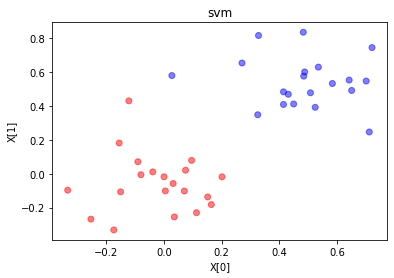

In [14]:
color = np.concatenate((np.repeat("red", n), np.repeat("blue",n)), axis=0) #y is split half-half
plt.scatter(X[:,0],X[:, 1], c = color, alpha= .5)
plt.xlabel( 'X[0]' )
plt.ylabel( 'X[1]' )
plt.title( 'svm' )
plt.show()

**Train an SVM classifier with linear Kernel**

In [16]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X, y);

**Show the confusion matrix on the training-set (we do not have a test-set, hence use the given data)**

In [18]:
cm = confusion_matrix(y, clf.predict(X))
cm

array([[20,  0],
       [ 0, 20]])

**Visualize the decision boundary of the Kernel by using the `mlxtend` package**

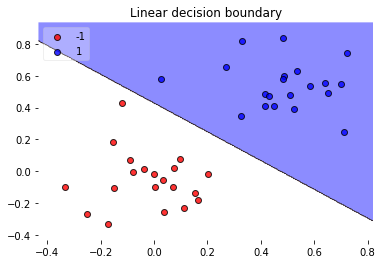

In [19]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plot_decision_regions(X, y, clf=clf, legend=2, colors = "red,blue", markers= "o", zoom_factor = 10);
    ax=plt.gca();
    plt.title("Linear decision boundary")
    plt.show();

**Relate the visualization of the decision boundary with the performance observed in the confusion matrix**

- Answer: SVM can perfectly classify all points into their respective classes.

#### Task 2: Support Vector Machines-based classifier on nested data
Load the 2-D data `Case1rings/X.npy` that has 150 rows and 2 columns, and the corresponding target `Case1rings/y.np`

In [51]:
X = np.load('Case1rings/X.npy')
y = np.load('Case1rings/Y.npy')
c1 = np.sum(y==1)
c2 = np.sum(y==-1)
c1

100

**Plot the two-dimensional points and color them so that points with the same class have the same color**

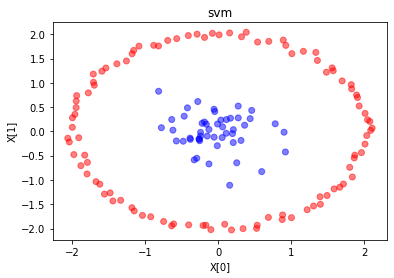

In [52]:
color = np.concatenate((np.repeat("red", c1), np.repeat("blue",c2)), axis=0) #y is split half-half
plt.scatter(X[:,0],X[:, 1], c = color, alpha= .5)
plt.xlabel( 'X[0]' )
plt.ylabel( 'X[1]' )
plt.title( 'svm' )
plt.show()

**Train an SVM classifier with linear Kernel**

In [53]:
clf = svm.SVC(kernel='linear')
clf.fit(X,y)

SVC(kernel='linear')

**Show the confusion matrix on the training-set**

In [54]:
cm = confusion_matrix(y,clf.predict(X))
cm

array([[  0,  50],
       [  0, 100]])

**Visualize the decision boundary of the Kernel by using the `mlxtend` package**

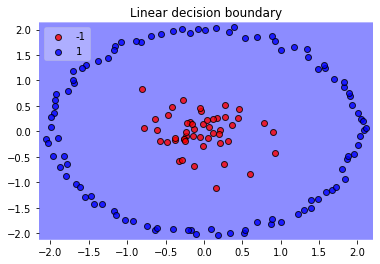

In [55]:
with warnings.catch_warnings(): #otherwise the package might complain there is no "boundary" when we classify all same
    warnings.simplefilter("ignore")
    plot_decision_regions(X, y, clf=clf, legend=2, colors = "red,blue", markers= "o", zoom_factor = 10);
    ax=plt.gca();
    plt.title("Linear decision boundary")
    plt.show();

**Train an SVM classifier with radial Kernel**

In [56]:
clf = svm.SVC(kernel = 'rbf')
clf.fit(X,y)
cm2 = confusion_matrix(y,clf2.predict(X))
cm2

array([[ 50,   0],
       [  0, 100]])

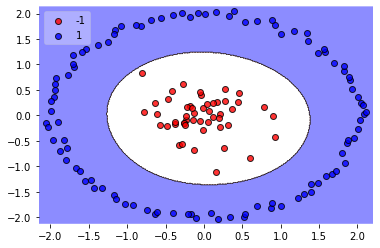

In [57]:
with warnings.catch_warnings(): #otherwise the package will complain there is no "boundary" as we classify all as '1'
    warnings.simplefilter("ignore")
    plot_decision_regions(X, y, clf=clf, legend=2, colors = "red,blue", markers= "o", zoom_factor = 10);
    ax=plt.gca();
    plt.show();

**Try polynomial Kernel with degree 2**

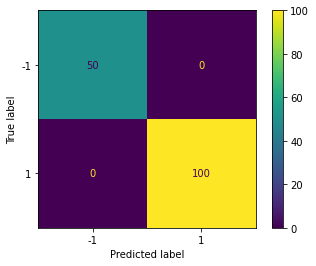

In [58]:
clf = svm.SVC(kernel = 'poly', degree = 2)
clf.fit(X, y)
cm = confusion_matrix(y, clf.predict(X))
cmd = ConfusionMatrixDisplay(cm, display_labels=np.unique(y))
cmd.plot();

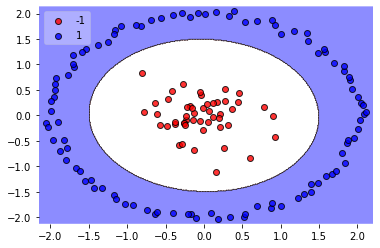

In [59]:
with warnings.catch_warnings(): #otherwise the package will complain there is no "boundary" as we classify all as '1'
    warnings.simplefilter("ignore")
    plot_decision_regions(X, y, clf=clf, legend=2, colors = "red,blue", markers= "o", zoom_factor = 10);
    ax=plt.gca();
    plt.show();

**Comapre the classifiers obtained in this case and discuss why some are better than some others**

- Answer: Linear classifier cannot separate this data, so radial kernel is better.